# GLMs

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
boston = datasets.load_boston()
X = boston['data']
y = boston['target']

In this section, we'll build a class for fitting Poisson regression models. First, let's again create the `standard_scaler` function to standardize our input data.

In [2]:
def standard_scaler(X):
    means = X.mean(0)
    stds = X.std(0)
    return (X - means)/stds

We saw in the GLM {doc}`concept </content/c2/s1/GLMs>` page that the gradient of the loss function (the negative log-likelihood) in a Poisson model is given by

$$
\dadb{\mathcal{L}(\bbetahat)}{\bbetahat} = \bX^\top(\hat{\by} - \by),
$$

where 

$$
\hat{\by} = \exp(\bX \bbetahat).
$$

The class below constructs Poisson regression using gradient descent with these results. Again, for simplicity we use a straightforward implementation of gradient descent with a fixed number of iterations and a constant learning rate. 

In [3]:
class PoissonRegression:
    
    def fit(self, X, y, n_iter = 1000, lr = 0.00001, add_intercept = True, standardize = True):
        
        # record stuff
        if standardize:
            X = standard_scaler(X)
        if add_intercept:
            ones = np.ones(len(X)).reshape((len(X), 1))
            X = np.append(ones, X, axis = 1)
        self.X = X
        self.y = y
        
        # get coefficients
        beta_hats = np.zeros(X.shape[1])
        for i in range(n_iter):
            y_hat = np.exp(np.dot(X, beta_hats))
            dLdbeta = np.dot(X.T, y_hat - y)
            beta_hats -= lr*dLdbeta

        # save coefficients and fitted values
        self.beta_hats = beta_hats
        self.y_hat = y_hat
            

Now we can fit the model on the {doc}`Boston housing </content/appendix/data>` dataset, as below. 

In [4]:
model = PoissonRegression()
model.fit(X, y)

The plot below shows the observed versus fitted values for our target variable. It is worth noting that there does not appear to be a pattern of under-estimating for high target values like we saw in the ordinary linear regression {doc}`example </content/c1/construction>`. In other words, we do not see a pattern in the residuals, suggesting Poisson regression might be a more fitting method for this problem.

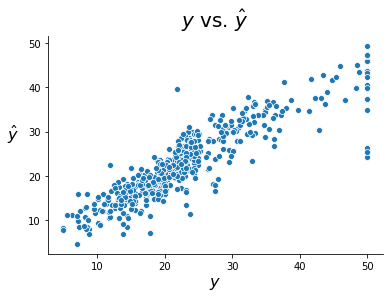

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(model.y, model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()